# Base plot仿geom_density()

https://www.cnblogs.com/Enjoy-Respect-9527/p/12901774.html


[Mirror density chart with ggplot2](https://www.r-graph-gallery.com/density_mirror_ggplot2.html)

## 生成数据

In [1]:
set.seed(20210224)

data <- data.frame(
  var1 = rnorm(1000),
  var2 = rnorm(1000, mean=2)
)
head(data)

,var1,var2
,<dbl>,<dbl>
1,-0.50965073,4.1340950
2,0.76917843,3.2115668
3,-0.08375239,-0.7406393
4,0.06421457,4.0748335
5,-1.89145465,1.0078363
6,0.35279851,1.6349789


## ggplot2

### geom_density

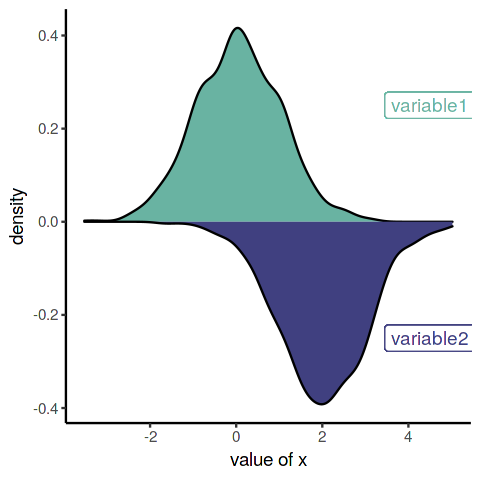

In [2]:
library(ggplot2)

g1=ggplot(data, aes(x=x) ) +
  # Top
  geom_density( aes(x = var1, y = ..density..), fill="#69b3a2" ) +
  geom_label( aes(x=4.5, y=0.25, label="variable1"), color="#69b3a2") +
  # bottom
  geom_density( aes(x = var2, y = -..density..), fill= "#404080") +
  geom_label( aes(x=4.5, y=-0.25, label="variable2"), color="#404080") +

  xlab("value of x")+
  theme_classic()

options(repr.plot.width=4, repr.plot.height=4)
g1

### geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



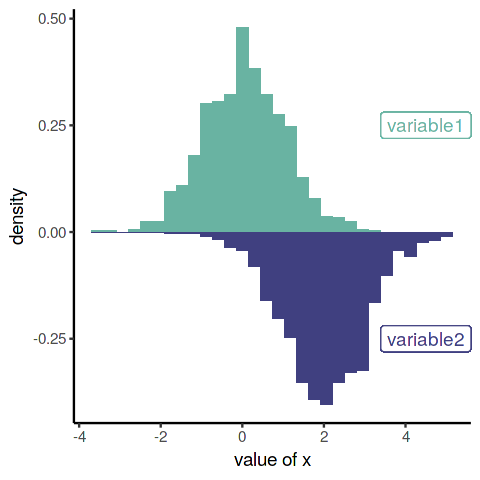

In [3]:
p <- ggplot(data, aes(x=x) ) +
  geom_histogram( aes(x = var1, y = ..density..), fill="#69b3a2" ) +
  geom_label( aes(x=4.5, y=0.25, label="variable1"), color="#69b3a2") +
  geom_histogram( aes(x = var2, y = -..density..), fill= "#404080") +
  geom_label( aes(x=4.5, y=-0.25, label="variable2"), color="#404080") +
  theme_classic() +
  xlab("value of x")

p

## R base plot

### 数据预处理

In [4]:
a<-density(data$var1)
b<-density(data$var2)

# check
str(a)

List of 7
 $ x        : num [1:512] -4.2 -4.19 -4.17 -4.15 -4.14 ...
 $ y        : num [1:512] 2.02e-05 2.49e-05 3.04e-05 3.70e-05 4.48e-05 ...
 $ bw       : num 0.224
 $ n        : int 1000
 $ call     : language density.default(x = data$var1)
 $ data.name: chr "data$var1"
 $ has.na   : logi FALSE
 - attr(*, "class")= chr "density"


In [5]:
# check
a$x[1:10]
a$y[1:10]

[1] -4.200866 -4.185146 -4.169425 -4.153705 -4.137984 -4.122264 -4.106543
 [8] -4.090822 -4.075102 -4.059381

[1] 2.022522e-05 2.489944e-05 3.044897e-05 3.699328e-05 4.477247e-05
 [6] 5.417295e-05 6.512616e-05 7.780518e-05 9.239027e-05 1.090684e-04

### 绘图: density

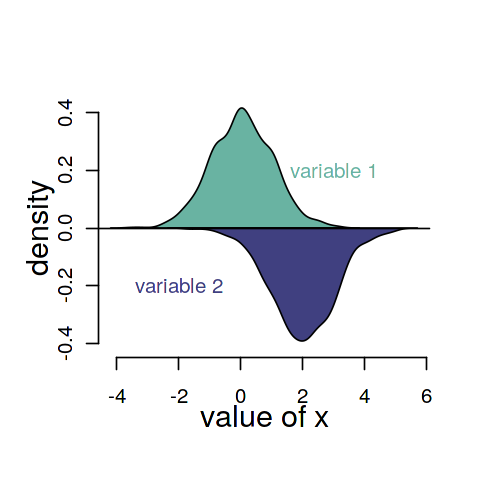

In [6]:
plot.new()
plot.window(xlim=c(min(a$x,b$x),max(a$x,b$x)), #设置x的极值范围
            ylim=c(min(-a$y,-b$y),max(a$y,b$y)))
# 上半部分
polygon(x=a$x,y=a$y,col="#69b3a2")
text(x=3,y=0.2,labels="variable 1",col="#69b3a2",cex=1)

polygon(x=b$x,y=-b$y,col= "#404080")
text(x=-2,y=-0.2,labels="variable 2",col="#404080",cex=1)

abline(h=0)
axis(1) #x轴及刻度
axis(2) #y轴及刻度

mtext(text="value of x",side=1,adj=0.5,line=2,cex=1.5) #x轴标题
mtext(text="density",side=2,adj=0.5,line=2,cex=1.5)